# Puntos extra: Grafica asociada a datos y algoritmo de warshall

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn.metrics.pairwise import euclidean_distances
drive.mount('/content/drive')

Mounted at /content/drive


## Tarea 1

In [ ]:
# Leer el archivo subido
file_path = "/content/drive/MyDrive/Anal discreto/Diabetes.csv"
data = pd.read_csv(file_path)

# Mostrar las primeras filas del archivo
data.head()

,Patient number,Relative weight,Fasting plasma glucose,Glucose area,Insulin area,SSPG,Clinical Classification
0,1,0.81,80,356,124,55,3
1,2,0.95,97,289,117,76,3
2,3,0.94,105,319,143,105,3
3,4,1.04,90,356,199,108,3
4,5,1.00,90,323,240,143,3


## Grafica asociada a datos

In [ ]:
# Generar funcion para vectorizar entradas y tomar distancia entre entradas
def distancia(data):
    X = data.values
    return np.sqrt(np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :])**2, axis=2))

In [ ]:
# Tomar distancia euclidiana entre datos
distancias = distancia(data)
distancias

array([[   0.        ,   72.58801278,   69.70664889, ...,  719.83262506,
        1011.84291765, 1269.45854793],
       [  72.58801278,    0.        ,   49.81967583, ...,  774.89999516,
        1059.89764864, 1326.66048562],
       [  69.70664889,   49.81967583,    0.        , ...,  743.98656009,
        1021.21154953, 1294.81197091],
       ...,
       [ 719.83262506,  774.89999516,  743.98656009, ...,    0.        ,
         354.09185828,  560.95813177],
       [1011.84291765, 1059.89764864, 1021.21154953, ...,  354.09185828,
           0.        ,  389.37274802],
       [1269.45854793, 1326.66048562, 1294.81197091, ...,  560.95813177,
         389.37274802,    0.        ]])

In [ ]:
# Tomar las distancias mayores a r para sustituirlas con una conexion
r = 100

for i in range(len(distancias)):
  for j in range(len(distancias)):
    if distancias[i][j] < r and distancias[i][j] != 0:
      distancias[i][j] = 1
    else:
      distancias[i][j] = 0

distancias

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

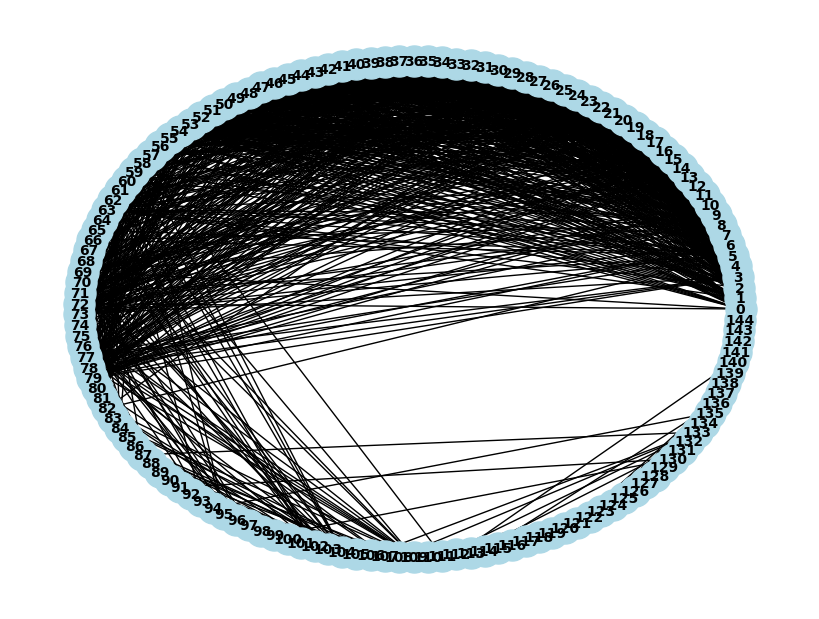

In [ ]:
# Construir el grafo e imprimir
G = nx.from_numpy_array(distancias)
plt.figure(figsize=(8, 6))
nx.draw(G, nx.circular_layout(G), with_labels=True, node_color='lightblue',
        node_size=500, font_size=10, font_weight='bold')
plt.show()

In [ ]:
# Definimos y aplicamos el pseudocodigo
def warshall(a):
  m = a
  c = m
  cp = c
  cambio = True
  stop = 0
  while stop < len(a) and cambio == True:
    cambio = False
    for i in range(len(a)):
      for i in range(len(a)):
        for k in range(len(a)):
          cp[i][j] = cp[i][j] or (c[i][k] and m[k][j])
          cambio = cambio or (c[i][j] != cp[i][j])
    c = cp
    stop += 1
  return c
cerradura = warshall(distancias)
cerradura

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

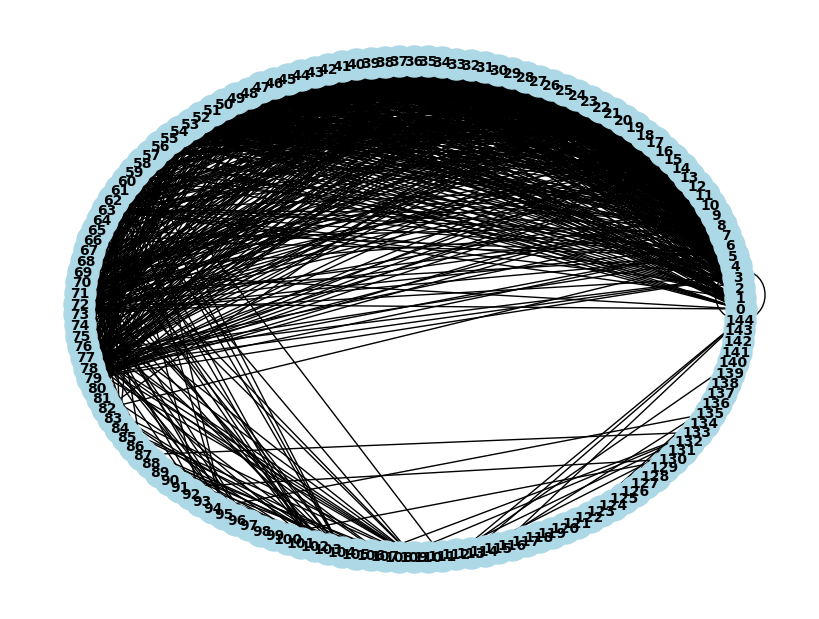

In [ ]:
# Graficamos
G2 = nx.from_numpy_array(cerradura)
plt.figure(figsize=(8, 6))
nx.draw(G2, nx.circular_layout(G), with_labels=True, node_color='lightblue',
        node_size=500, font_size=10, font_weight='bold')
plt.show()